In [1]:
# import library
import pandas
import numpy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
# assign directory
folder_path = './datasets/'
raw_file_name = 'onuni.FinanceAccounting.csv'
file_path = folder_path + 'preprocessed.' + raw_file_name
# load dataframe
df = pandas.read_csv(file_path, encoding="utf-8", nrows=None, index_col=0)

In [3]:
# view the loaded dataframe
df.head()

,index,id,title,is_paid,num_subscribers,average_rating,rating,num_reviews,num_lectures,num_tests,time_created,time_published,discount,price,discount_percent,rating_deviation
0,0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,6.161458,117.0,5.266204,0.01855
1,1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,6.161458,117.0,5.266204,0.01059
2,2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,6.161458,117.0,5.266204,-0.00165
3,3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,6.161458,117.0,5.266204,-0.00635
4,4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,6.161458,117.0,5.266204,0.00093


In [4]:
# deep copy data for training preditive model
learning_df = df.copy(deep=True)

In [5]:
# drop unused columns for training predictive model
drop_col = ['id', 'title','discount_percent', 'rating_deviation']
learning_df.drop(columns=drop_col, inplace=True)

In [6]:
# drop courses with less subscribers and reviews
learning_df.drop(\
    learning_df[learning_df['num_reviews'] < 100].index,
    inplace=True)

In [7]:
# convert other datatypes to numeric type
learning_df['is_paid'] = learning_df['is_paid'].astype('int')
learning_df['time_created'] = pandas.to_datetime(
    learning_df['time_created'])\
        .astype('int64') // 86400000000000
learning_df['time_published'] = pandas.to_datetime(
    learning_df['time_published'])\
        .astype('int64') // 86400000000000

In [8]:
learning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 13409
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3117 non-null   int64  
 1   is_paid          3117 non-null   int32  
 2   num_subscribers  3117 non-null   int64  
 3   average_rating   3117 non-null   float64
 4   rating           3117 non-null   float64
 5   num_reviews      3117 non-null   int64  
 6   num_lectures     3117 non-null   int64  
 7   num_tests        3117 non-null   int64  
 8   time_created     3117 non-null   int64  
 9   time_published   3117 non-null   int64  
 10  discount         3117 non-null   float64
 11  price            3117 non-null   float64
dtypes: float64(4), int32(1), int64(7)
memory usage: 304.4 KB


In [14]:
learning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 13409
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3117 non-null   int64  
 1   is_paid          3117 non-null   int32  
 2   num_subscribers  3117 non-null   int64  
 3   average_rating   3117 non-null   float64
 4   rating           3117 non-null   float64
 5   num_reviews      3117 non-null   int64  
 6   num_lectures     3117 non-null   int64  
 7   num_tests        3117 non-null   int64  
 8   time_created     3117 non-null   int64  
 9   time_published   3117 non-null   int64  
 10  discount         3117 non-null   float64
 11  price            3117 non-null   float64
dtypes: float64(4), int32(1), int64(7)
memory usage: 304.4 KB


In [15]:
# the model try to preditive rating of courses
# split training and tesing data for model
X = learning_df[['is_paid', 'average_rating', 'num_reviews', 'num_lectures', 'num_tests', 'num_subscribers']]
Y = learning_df['rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(2493, 6) (624, 6) (2493,) (624,)


In [11]:
from sklearn.linear_model import LogisticRegression

In [16]:
# Create model and training model
model = LinearRegression()

In [18]:
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense

In [44]:
model = Sequential()

In [45]:
# add LSTM layer
model.add(LSTM(units=150,\
        input_shape=X_train.shape))

In [46]:
Y_train_numpy = Y_train.to_numpy().reshape(-1,1)
Y_teset_numpy = Y_test.to_numpy().reshape(-1,1)

In [47]:
model.add(Dense(units=Y_train_numpy[1]))

In [49]:
model.compile(loss="mean_squared_error", optimizer="adam")

histories = model.fit (X_train, Y_train_numpy,\
            epochs=1,
            batch_size=32,
            validation_data=(X_test, Y_test),
            validation_batch_size=32,
            shuffle=False,
            verbose=1,
            use_multiprocessing=True)

ValueError: in user code:

    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\duong\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:215 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 11)


In [19]:
# use trained model to predicting
Y_predict = model.predict(X_test)

In [20]:
# creade evaluate_df for evaluate predicting data
evaluate_df = pandas.DataFrame(Y_test)
evaluate_df['predict_rating'] = Y_predict
evaluate_df['loss'] = evaluate_df['predict_rating'] - evaluate_df['rating']
evaluate_df[['id','title']] = df[['id','title']]
evaluate_df.reset_index(drop=True, inplace=True)
evaluate_df = evaluate_df[['id', 'title', 'rating', 'predict_rating', 'loss']]
evaluate_df.head()

,id,title,rating,predict_rating,loss
0,1723480,Real Estate Financial Modeling - The Complete ...,4.39341,4.287502,-0.105908
1,677348,Supply Chain Fundamentals: Understanding the ...,4.41710,4.427237,0.010137
2,831940,Accounting for Beginners: Financial Accounting...,4.27845,4.291054,0.012604
3,228668,Amazon FBA Beginners Course - Start Earning In...,4.32313,4.315706,-0.007424
4,87634,How to Become a Transcriptionist,4.40509,4.397164,-0.007926


<AxesSubplot:>

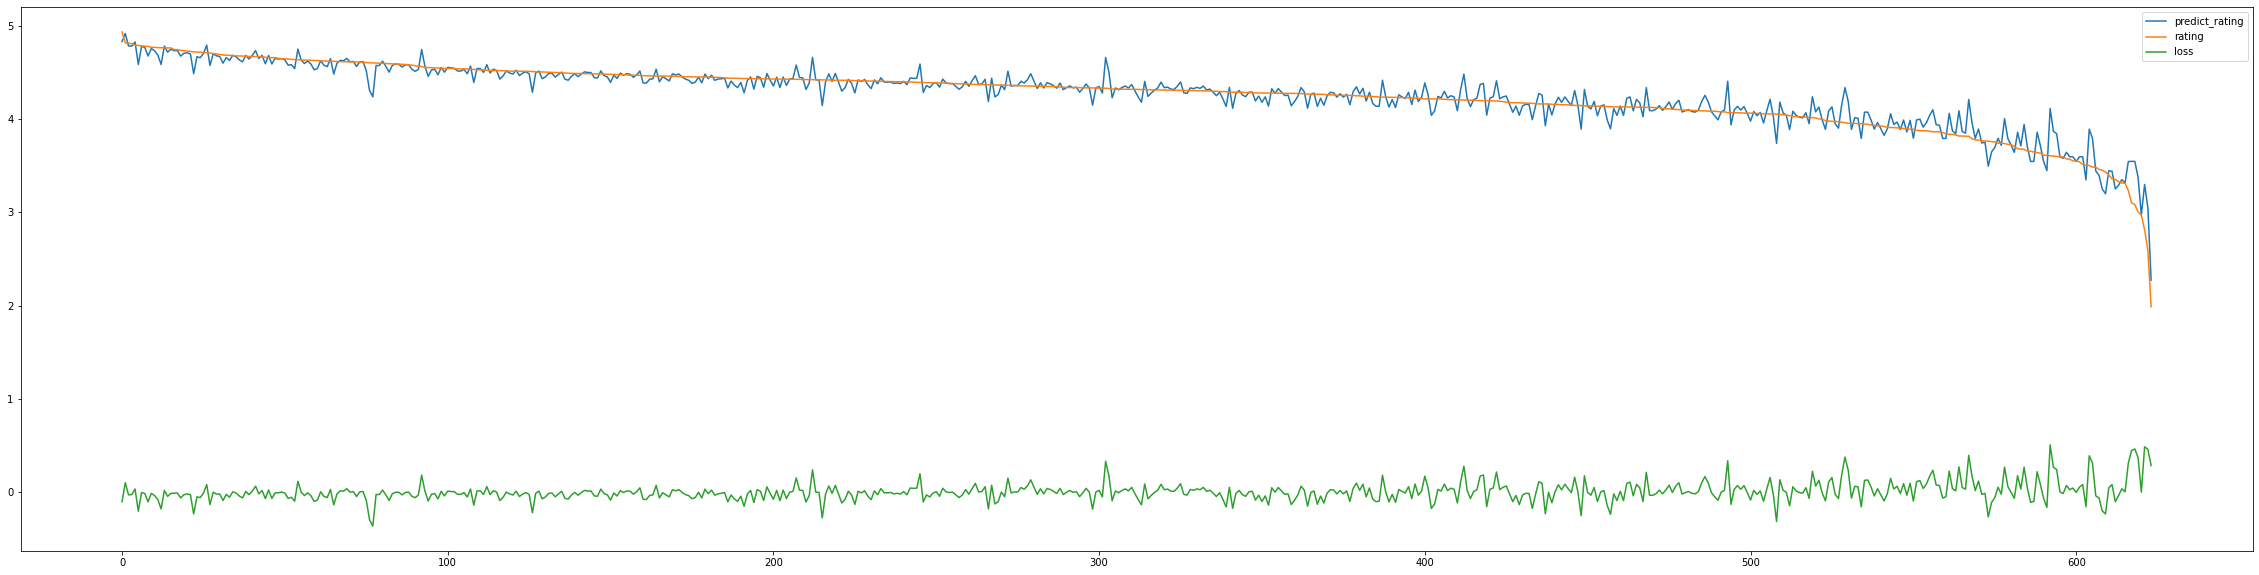

In [21]:
# show line chart about predict_rating and real rating
evaluate_df\
    .sort_values(by='rating', ascending=False)\
    .reset_index(drop=True)\
    .plot(y=['predict_rating', 'rating', 'loss'], figsize=(40,10))

In [22]:
# print linear regression coefficients
model.coef_

array([-4.26149088e-02,  9.90052784e-01,  6.86478061e-07, -4.43709414e-05,
       -6.02266020e-03,  8.81637876e-08])

In [23]:
model.score(X_test, Y_test)

0.9085436317169236

In [24]:
# show prediting error
mse = mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error:          ', mse)
print('Root Mean Squared Error:     ', numpy.sqrt(mse))

Mean Squared Error:           0.010428710248582447
Root Mean Squared Error:      0.1021210568324792


In [25]:
# show statistic of the loss
evaluate_df['loss'].describe()

count    624.000000
mean       0.003176
std        0.102154
min       -0.364448
25%       -0.041020
50%       -0.003602
75%        0.033184
max        0.506018
Name: loss, dtype: float64

<AxesSubplot:>

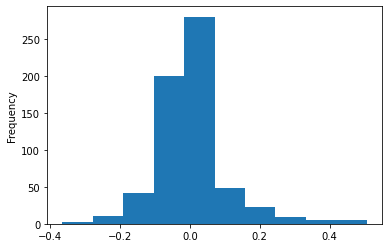

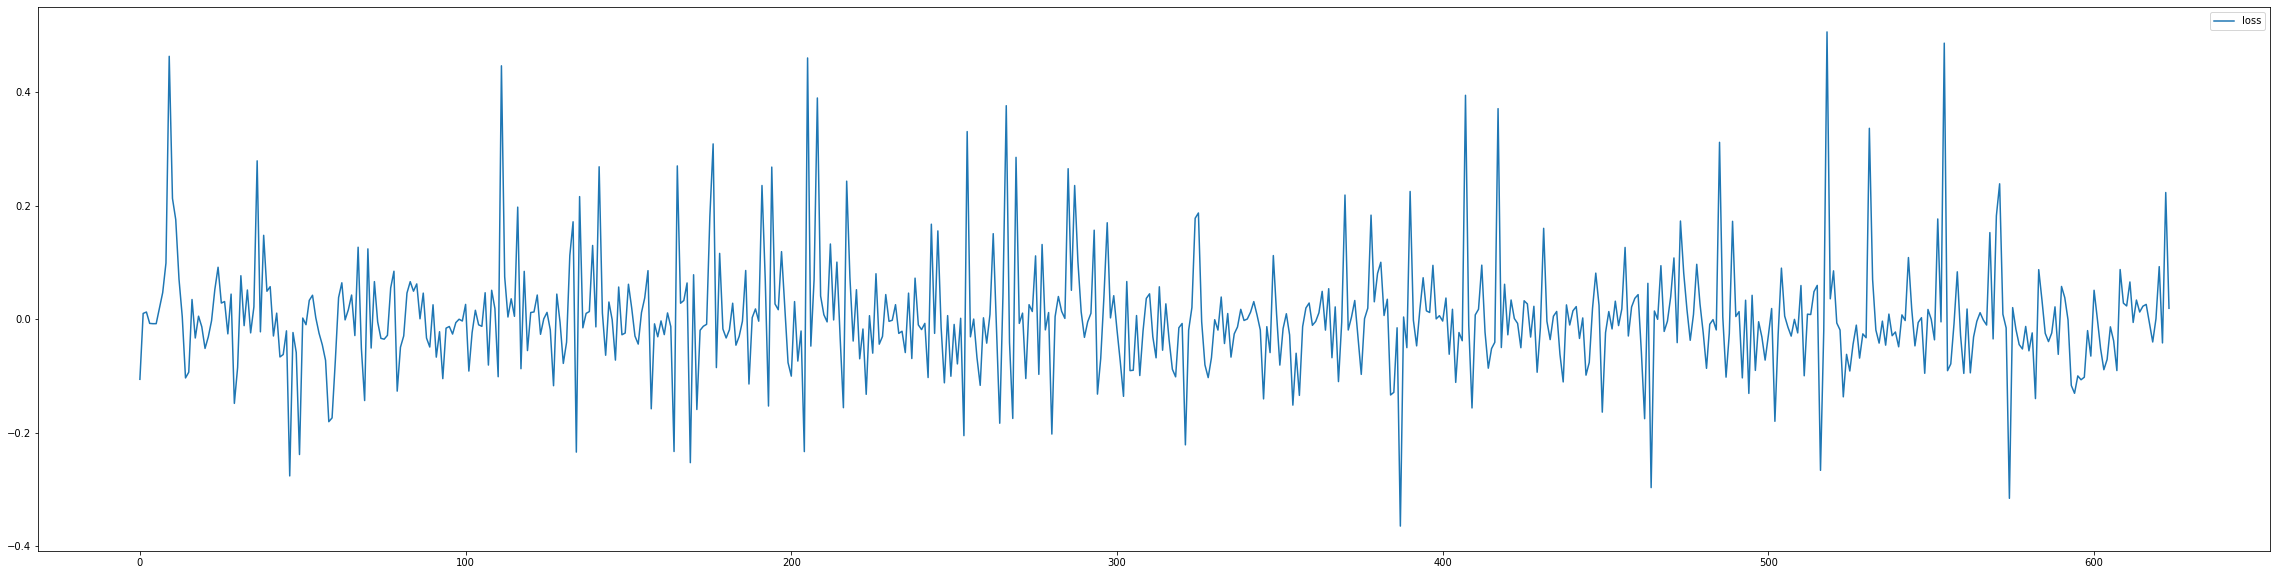

In [26]:
# show histogram about the loss
evaluate_df['loss'].plot(kind='hist')

# show line chart about the loss
evaluate_df.plot(y='loss',figsize=(40,10), kind='line')

In [27]:
# export training data
file_path = folder_path + 'learning.' + raw_file_name
learning_df.to_csv(file_path)

# export evaluating data
file_path = folder_path + 'evaluating.' + raw_file_name
evaluate_df.to_csv(file_path)